In [43]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numba import jit
import time
from math import comb
from termcolor import colored
plt.style.use('seaborn')

In [2]:
def hamming_distance(list1, list2):
    
    dist = 0
    for n in range(len(list1)):
        if list1[n] != list2[n]:
            dist += 1
    return dist

In [20]:

def linear_mutation_model(population_size, h_thr, z,
                          str_leng, max_time):
    """
    It simulates the linear mutation model.
    h_thr -- Threshhold for immiunity system
    z -- Number of people exposed by each infected individual
    str_leng -- The length of the string representing the pathogene
    """
    
    indiv = {}   # Memory repertoire for individuals
    for i in range(population_size):
        indiv[i] = [0, []]
    
    for time in range(max_time):
        if time == 0:
            bits = [0 for i in range(str_leng)]   # Bitstrings for pathogens
            r0 = random.randint(0, population_size-1)
            indiv[r0] = [1, [bits]]
            
            prob = np.zeros(max_time)    # Fraction infected at time t
            prob[0] = 1 / population_size
        else: 
            bits = bits.copy()
            bits[time-1] = 1    # Linear mutation in time
            
            infected = [i for i in range(population_size) if indiv[i][0]==1]   # Infected individuals
            exposed = set()   
            for i in infected:
                excluded = list(np.r_[0:i, i+1:population_size])
                exposed = exposed.union(random.sample(excluded, z))   # Exposed indivuals
                  
            # Add the strain to individual's memory    
            for i in exposed:
                if indiv[i][1] == []:
                    indiv[i][0] = 1
                    indiv[i][1].append(bits)   
                else:
                    h_min = str_leng + 1
                    for genes in indiv[i][1]:
                        d = hamming_distance(genes, bits)
                        h_min = min(h_min, d)
                    if h_min > h_thr:
                        indiv[i][0] = 1
                        indiv[i][1].append(bits) 
                                    
            for i in infected:
                indiv[i][0] = 0   
     
            prob[time] = len([i for i in range(population_size) if indiv[i][0]==1])/population_size  
            
    return prob  


def linear_mutation_plots(population_size, hvec, zvec,
                          str_leng, max_time):
    
    fig, ax = plt.subplots(len(zvec), len(hvec), figsize=(15,10))
    t = np.linspace(0, max_time, max_time)
   
    for i, z in enumerate(zvec):
        for j, h_thr in enumerate(hvec):
            
            col = ['black','green','orchid','orange','cornflowerblue','red']
            prob = linear_mutation_model(population_size, h_thr,
                                         z, str_leng, max_time)
            
            ax[i,j].plot(t, prob, color=col[i], linewidth=1)
            ax[i,j].set_title(r'$h_{thr}$=%1.1f' %h_thr)
            ax[-1,j].set_xlabel('time', fontsize=14)
            ax[i,0].set_ylabel('z=%1.1f' %z, fontsize=14, fontweight='bold')
            fig.text(-0.02, 0.5, 'fraction infected ($p_t$)', va='center',
                     rotation='vertical', fontsize=18)
            plt.suptitle('Different behavior of $p_t$ with different parameters',\
                         y=1.05, color='purple', fontsize=18, fontweight='bold')
            plt.tight_layout()
            plt.savefig('p1.png')
            

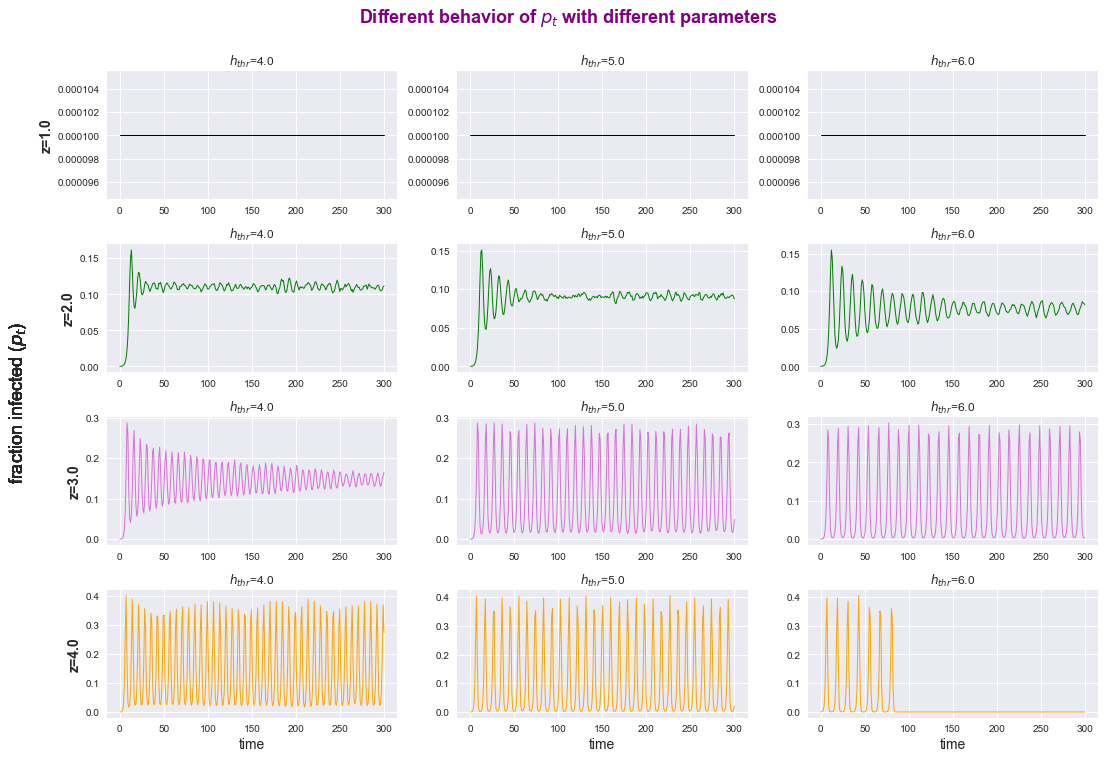

In [17]:
"""Solve and plot"""

hvec = [4, 5, 6]
zvec = [1, 2, 3, 4] 
population_size = 10**4
max_time = 300
str_leng = 300
mutation_rate = 1

linear_mutation_plots(population_size, hvec, zvec,
                      str_leng, max_time)

In [44]:
def fraction_infected(tau, z, T):
    
    """
    It returns a difference equation for the linear model.
    tau -- time steps an individual remains recoverd before infected 
    z -- Number of people exposed by one infected individual
    T -- max time
    """
    
    p = np.zeros(T)  # Fraction infected
    p[tau] = 10**-4
    
    for t in range(tau, T-1): 
        p[t+1] = (1 - np.exp(-z*p[t]))*(1 - sum([p[t-i] for i in range(tau)]))
        
    return p


def plots(tauvec, zvec, T):
    
    fig, ax = plt.subplots(len(zvec), len(tauvec), figsize=(15,10))
    t = np.linspace(0, T, T)
   
    for i, z in enumerate(zvec):
        for j, tau in enumerate(tauvec):
            
            col = ['black','green','orchid','orange','cornflowerblue','red']
            p = fraction_infected(tau, z, T)
            
            ax[i,j].plot(t, p, color=col[i], linewidth=1)
            ax[i,j].set_title(r'$\tau$={}'.format(tau))
            ax[-1,j].set_xlabel('time', fontsize=14)
            ax[i,0].set_ylabel('z=%1.1f' %z, fontsize=14, fontweight='bold')
            fig.text(-0.02, 0.5, 'fraction infected ($p_t$)', va='center',
                     rotation='vertical', fontsize=18)
            plt.suptitle('Different behavior of $p_t$ with different parameters',\
                         y=1.05, color='purple', fontsize=18, fontweight='bold')
            plt.tight_layout()
            plt.savefig('p5.png')
            

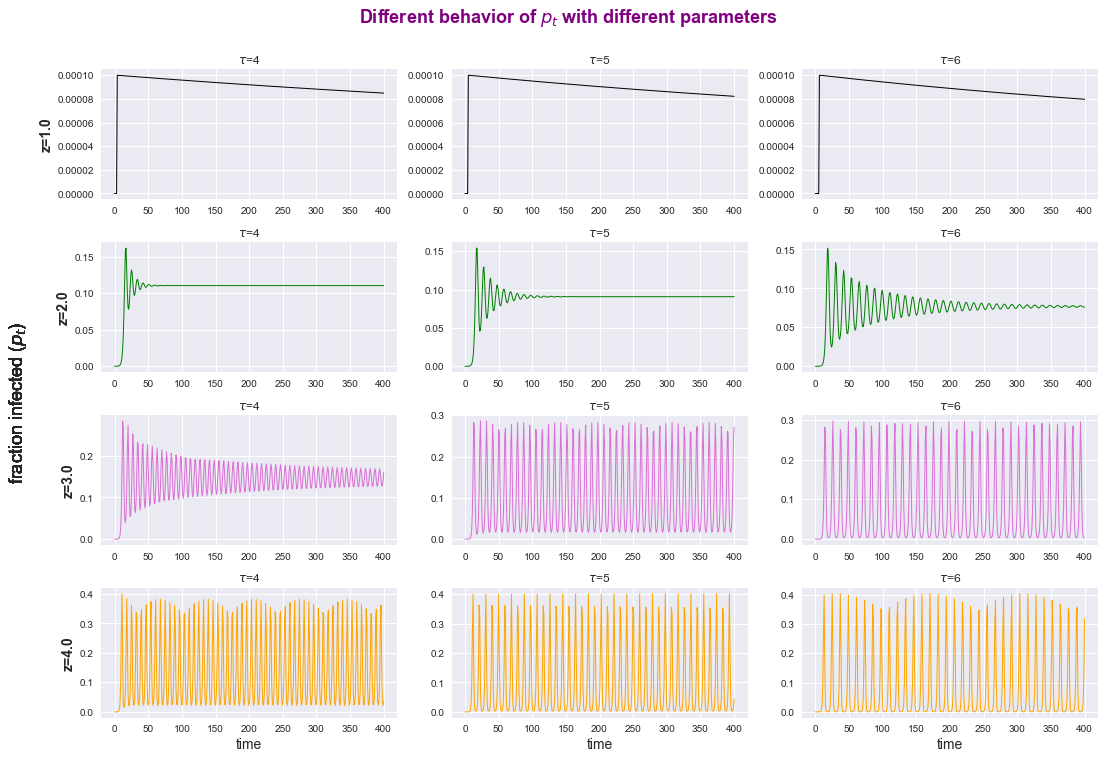

In [45]:
""" Solve and plot"""  

T  = 400
tauvec = [4, 5, 6]
zvec = [1, 2, 3, 4] 

plots(tauvec, zvec, T)

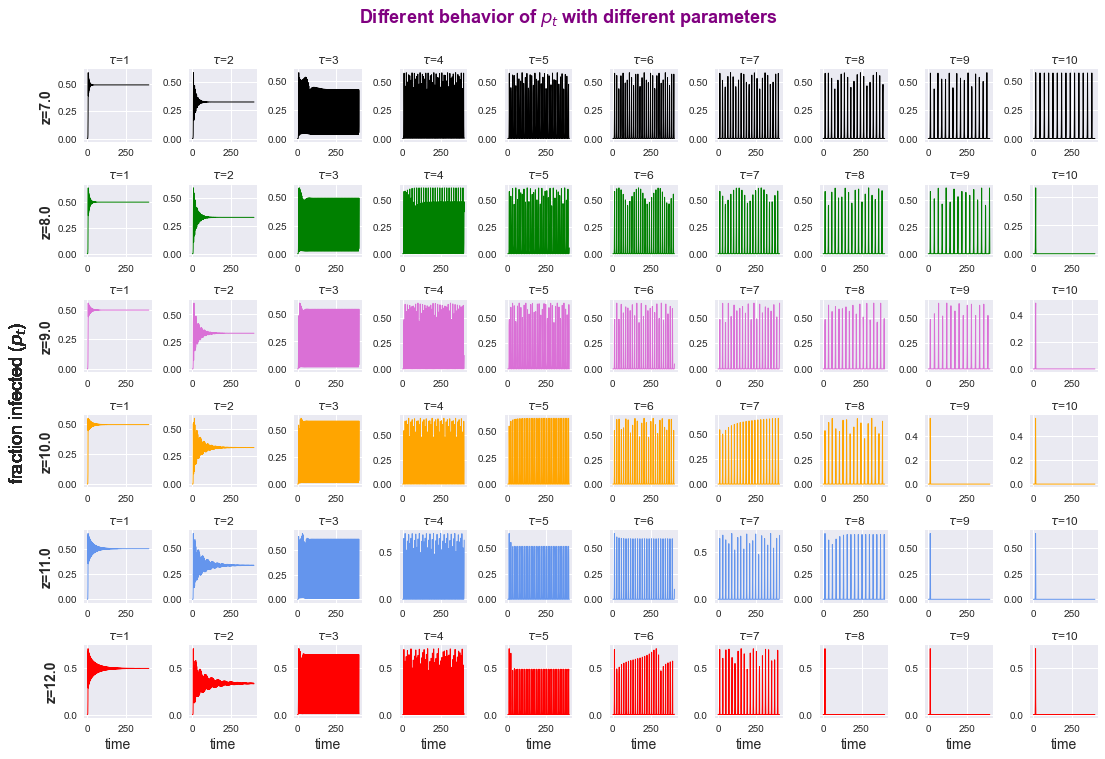

In [23]:
T  = 400
tauvec = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
zvec = [7, 8, 9, 10, 11, 12] 

plots(tauvec, zvec, T)

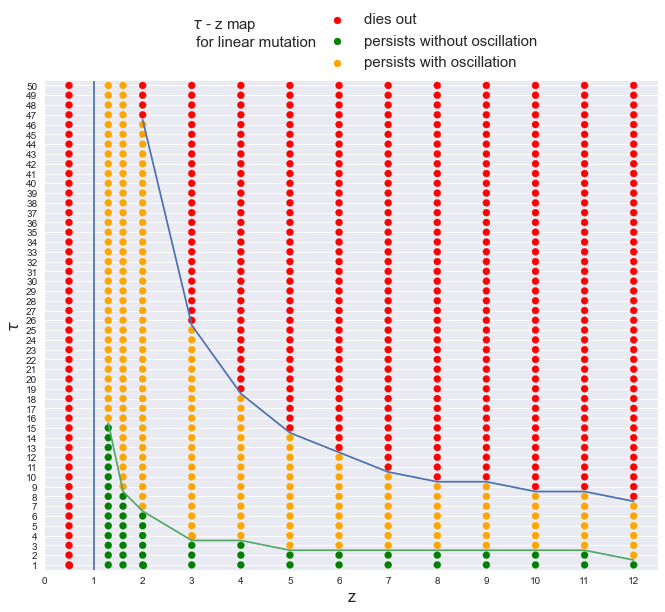

In [50]:
color = {}
color[0] = ['r' for i in range(50)]
color[1] = ['r' for i in range(50)]
color[2] = ['g' for i in range(6)] + ['orange' for i in range(40)] + ['r' for i in range(4)]
color[3] = ['g' for i in range(3)] + ['orange' for i in range(22)] + ['r' for i in range(25)]
color[4] = ['g' for i in range(3)] + ['orange' for i in range(15)] + ['r' for i in range(32)]
color[5] = ['g' for i in range(2)] + ['orange' for i in range(12)] + ['r' for i in range(36)]
color[6] = ['g' for i in range(2)] + ['orange' for i in range(10)] + ['r' for i in range(38)]
color[7] = ['g' for i in range(2)] + ['orange' for i in range(8)] + ['r' for i in range(40)]
color[8] = ['g' for i in range(2)] + ['orange' for i in range(7)] + ['r' for i in range(41)]
color[9] = ['g' for i in range(2)] + ['orange' for i in range(7)] + ['r' for i in range(41)]
color[10] = ['g' for i in range(2)] + ['orange' for i in range(6)] + ['r' for i in range(42)]
color[11] = ['g' for i in range(2)] + ['orange' for i in range(6)] + ['r' for i in range(42)]
color[12] = ['g' for i in range(1)] + ['orange' for i in range(6)] + ['r' for i in range(43)]
color[13] = ['g' for i in range(15)] + ['orange' for i in range(35)]
color[14] = ['g' for i in range(8)] + ['orange' for i in range(42)]

plt.figure(figsize=(11,9))
for k in range(2,13):
    plt.scatter([k for i in range(50)], [i for i in range(1,51)] ,color=color[k])
plt.scatter([0.5 for i in range(50)], [i for i in range(1,51)] , color=color[0])    
plt.scatter([1.3 for i in range(50)], [i for i in range(1,51)] , color=color[13])
plt.scatter([1.6 for i in range(50)], [i for i in range(1,51)] , color=color[14])
plt.axvline(x=1)
plt.plot([2,3,4,5,6,7,8,9,10,11,12], [46.5,25.5,18.5,14.5,12.5,10.5,9.5,9.5,8.5,8.5,7.5])
plt.plot([1.3,1.6]+[i for i in range(2,13)], [15.5,8.5,6.5,3.5,3.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,1.5])
plt.scatter([0.5],[1], color='red', label='dies out')
plt.scatter([2],[1], color='green', label='persists without oscillation')
plt.scatter([3],[4], color='orange', label='persists with oscillation')

plt.xlabel('z', fontsize=16)
plt.ylabel(r'$\tau$', fontsize=16)
plt.xticks(np.linspace(0, 12, 13))
plt.yticks(np.linspace(1, 50, 50))
plt.xlim([0, 12.5])
plt.ylim([0.5, 50.5])
plt.legend(bbox_to_anchor=(0.43, 0.995), fontsize=15)
plt.text(3, 54, r'$\tau$ - z map'\
          ' \n for linear mutation', fontsize=15)
plt.savefig('map1.png')
plt.show()    

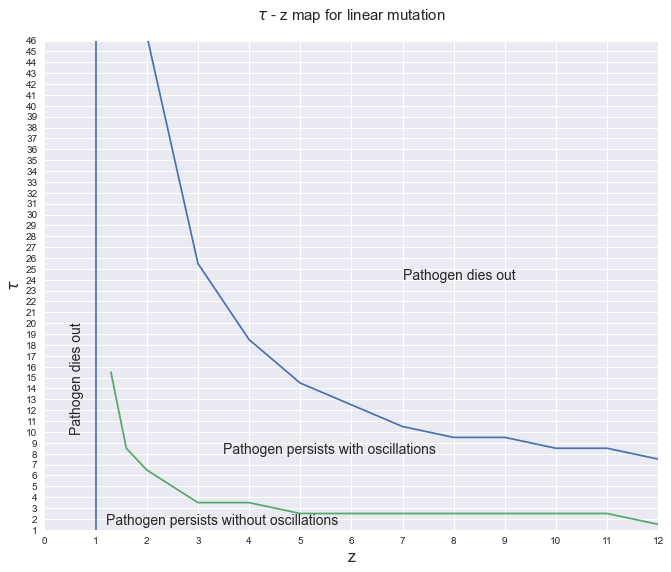

In [52]:
plt.figure(figsize=(11,9))
plt.axvline(x=1)
plt.plot([2,3,4,5,6,7,8,9,10,11,12], [46.5,25.5,18.5,14.5,12.5,10.5,9.5,9.5,8.5,8.5,7.5])
plt.plot([1.3,1.6]+[i for i in range(2,13)], [15.5,8.5,6.5,3.5,3.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,1.5])
plt.xticks(np.linspace(0,12,13))
plt.yticks(np.linspace(1,50,50))
plt.xlabel('z', fontsize=16)
plt.ylabel(r'$\tau$', fontsize=16)
plt.title(r'$\tau$ - z map for linear mutation', fontsize=15, y=1.03)
plt.xlim([0,12])
plt.ylim([1,46])
plt.text(1.2,1.5,'Pathogen persists without oscillations',fontsize=14)
plt.text(3.5,8,'Pathogen persists with oscillations',fontsize=14)
plt.text(7,24,'Pathogen dies out',fontsize=14)
plt.text(0.5,10,'Pathogen dies out', rotation='vertical',fontsize=14)
plt.savefig('map2.png')
plt.show()

In [3]:
# Random function for mutation.
Y = [0 for i in range(400)]
for i in range(400):
    if np.random.rand() < 0.8:
        Y[i] = 1

In [40]:

def random_mutation_model(population_size, h_thr, z, str_leng,
               mutation_rate, max_time):
    """
    It returns the fraction infected when mutation is random.
    h_thr -- Threshhold for immiunity system
    z -- Number of people exposed by one infected individual
    str_leng -- The length of the string representing the gene
    """
   
            
    indiv = {}   # Memory repertoire for individuals
    for i in range(population_size):
        indiv[i] = [0, []]
    
    for time in range(max_time):
        if time == 0:
            bits = [0 for i in range(str_leng)]   # Bitstrings for pathogens
            r0 = random.randint(0, population_size-1)
            indiv[r0] = [1, [bits]]
            
            prob = np.zeros(max_time)    # Fraction infected at time t
            prob[0] = 1 / population_size
        else: 
            bits = bits.copy()
            bits[time-1] = Y[time-1]    
            
            infected = [i for i in range(population_size) if indiv[i][0]==1]   # Infected individuals
            exposed = set()   
            for i in infected:
                excluded = list(np.r_[0:i, i+1:population_size])
                exposed = exposed.union(random.sample(excluded, z))   # Exposed indivuals
                  
            # Add the strain to individual's memory    
            for i in exposed:
                if indiv[i][1] == []:
                    indiv[i][0] = 1
                    indiv[i][1].append(bits) 
                else:
                    h_min = str_leng + 1
                    for genes in indiv[i][1]:
                        d = hamming_distance(genes, bits)
                        h_min = min(h_min, d)
                    if h_min > h_thr:
                        indiv[i][0] = 1
                        indiv[i][1].append(bits)               
                                    
            for i in infected:
                indiv[i][0] = 0   
     
            prob[time] = len([i for i in range(population_size) if indiv[i][0]==1])/population_size  
            
            
    return prob  


def random_mutation_plots(population_size, hvec, zvec,
                          str_leng, mutation_rate, max_time):
    
    fig, ax = plt.subplots(len(zvec), len(hvec), figsize=(15,10))
    t = np.linspace(0, max_time, max_time)
   
    for i, z in enumerate(zvec):
        for j, h_thr in enumerate(hvec):
            
            col = ['black','green','orchid','orange','cornflowerblue','red']
            prob = random_mutation_model(population_size, h_thr, z, str_leng,
                              mutation_rate, max_time)
            
            ax[i,j].plot(t, prob, color=col[i], linewidth=1)
            ax[i,j].set_title(r'$h_{thr}$=%1.1f' %h_thr)
            ax[-1,j].set_xlabel('time', fontsize=14)
            ax[i,0].set_ylabel('z=%1.1f' %z, fontsize=14, fontweight='bold')
            fig.text(-0.02, 0.5, 'fraction infected ($p_t$)', va='center',
                     rotation='vertical', fontsize=18)
            plt.suptitle('Different behavior of $p_t$ with different parameters',\
                         y=1.05, color='purple', fontsize=18, fontweight='bold')
            plt.tight_layout()
            plt.savefig('p1.png')

Total execution time is 2817.71


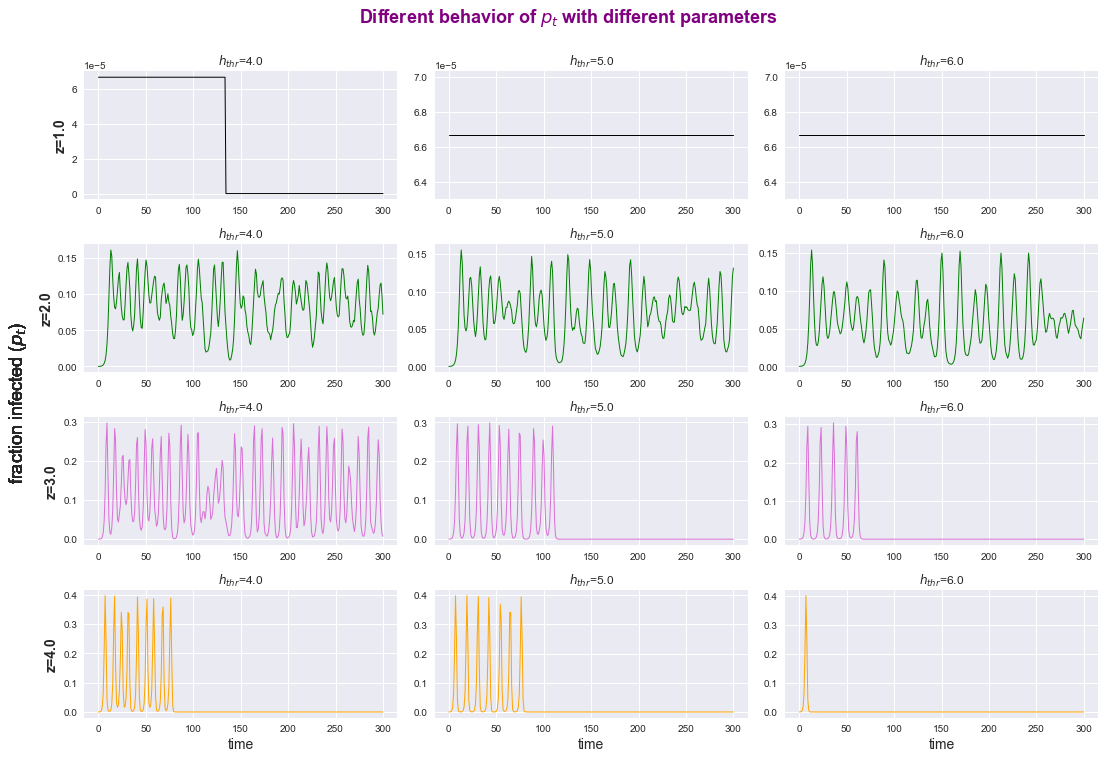

In [7]:
start = time.time()

"""Solve and plot"""

hvec = [4, 5, 6]
zvec = [1, 2, 3, 4] 
population_size = 15000
max_time = 300
str_leng = 300
mutation_rate = 0.8

random_mutation_plots(population_size, hvec, zvec,
                    str_leng, mutation_rate, max_time)

end = time.time()
print('Total execution time is %1.2f' %(end-start))

In [41]:
def random_mutation_solution(z, h, mu, T, num_sim):
    
    """
    It returns a difference equation for non-linear mutation.
    tau -- time steps an individual remains recoverd before infected 
    z -- Number of people exposed by one infected individual
    T -- max time
    """
            
    p = np.zeros(T)  # Fraction infected
    p[0] = 10**-4
        
    for t in range(1,T): 
        for k in range(1,t+1):
            if np.sum([Y[t-i] for i in range(1,k+1)]) > h:
                g = k-1
                break
        else:
            g = t         
            
        p[t] = (1 - np.exp(-z*p[t-1]))*(1 - sum([p[t-1-i] for i in range(g)]))
        
    return p


def random_mutation_solution_plots(hvec, zvec, mu, T, num_sim):
    
    fig, ax = plt.subplots(len(zvec), len(hvec), figsize=(15,10))
    t = np.linspace(0, T, T)
   
    for i, z in enumerate(zvec):
        for j, h in enumerate(hvec):
            
            col = ['black','green','orchid','orange','cornflowerblue','red']
            simulations = [random_mutation_solution(z, h, mu, T, j) for j in range(num_sim) ]
            p_aver = np.mean(simulations, axis=0)
            
            ax[i,j].plot(t, p_aver, color=col[i], linewidth=1)
            ax[i,j].set_title(r'$h_{thr}$=%1.1f' %h)
            ax[-1,j].set_xlabel('time', fontsize=14)
            ax[i,0].set_ylabel('z=%1.1f' %z, fontsize=14, fontweight='bold')
            fig.text(-0.02, 0.5, 'fraction infected ($p_t$)', va='center',
                     rotation='vertical', fontsize=18)
            plt.suptitle('Different behavior of $p_t$ with different parameters',\
                         y=1.05, color='purple', fontsize=18, fontweight='bold')
            plt.tight_layout()
            plt.savefig('p2.png')

Total execution time is 26.54


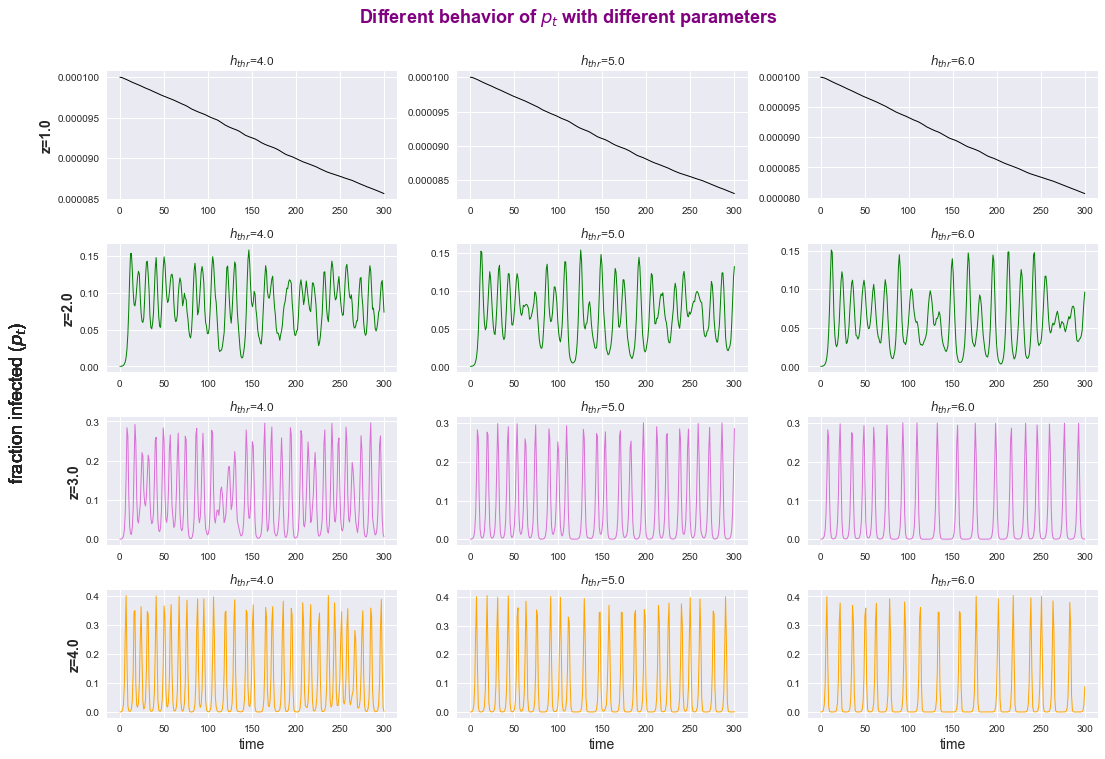

In [9]:
"""Solve and plot"""

start = time.time()

hvec = [4,5,6]
zvec = [1,2,3,4] 
T = 300
mu = 0.8
num_sim = 100

random_mutation_solution_plots(hvec, zvec, mu, T, num_sim)

end = time.time()
print('Total execution time is %1.2f' %(end-start))

Total execution time is 344.88


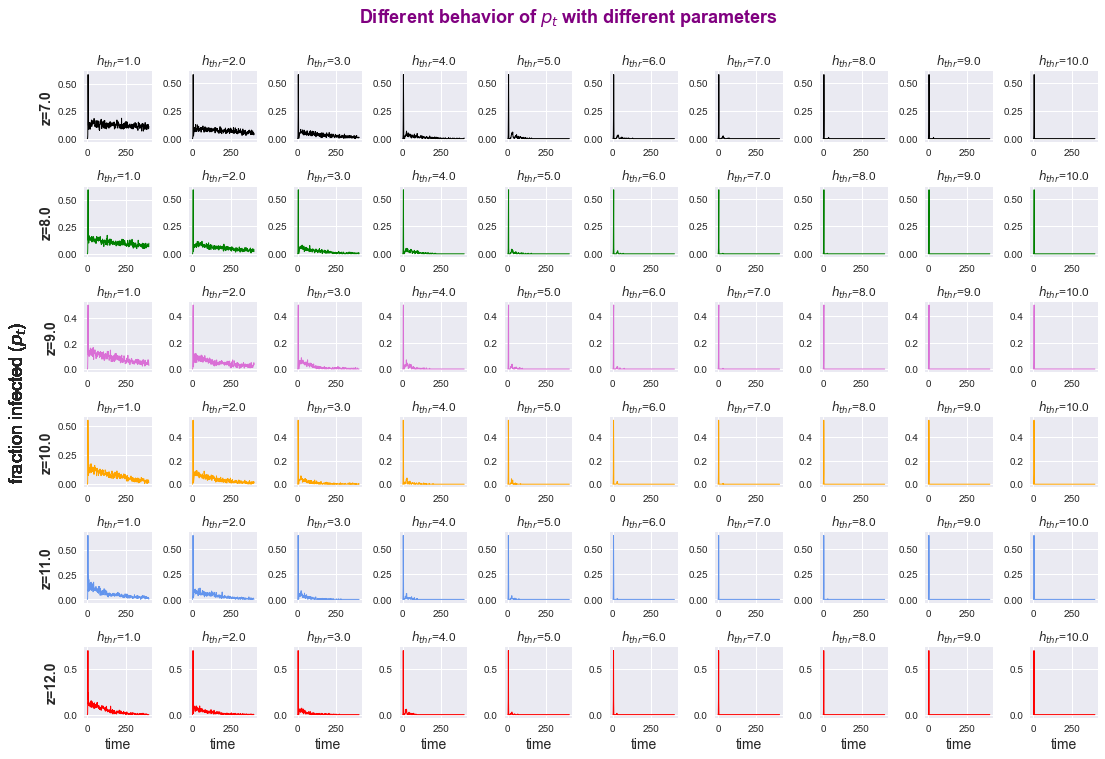

In [212]:
"""Solve and plot"""

start = time.time()

hvec = [1,2,3,4,5,6,7,8,9,10]
zvec = [7,8,9,10,11,12] 
T = 400
mu = 0.5
num_sim = 100

random_mutation_solution_plots(hvec, zvec, mu, T, num_sim)

end = time.time()
print('Total execution time is %1.2f' %(end-start))

Total execution time is 372.96


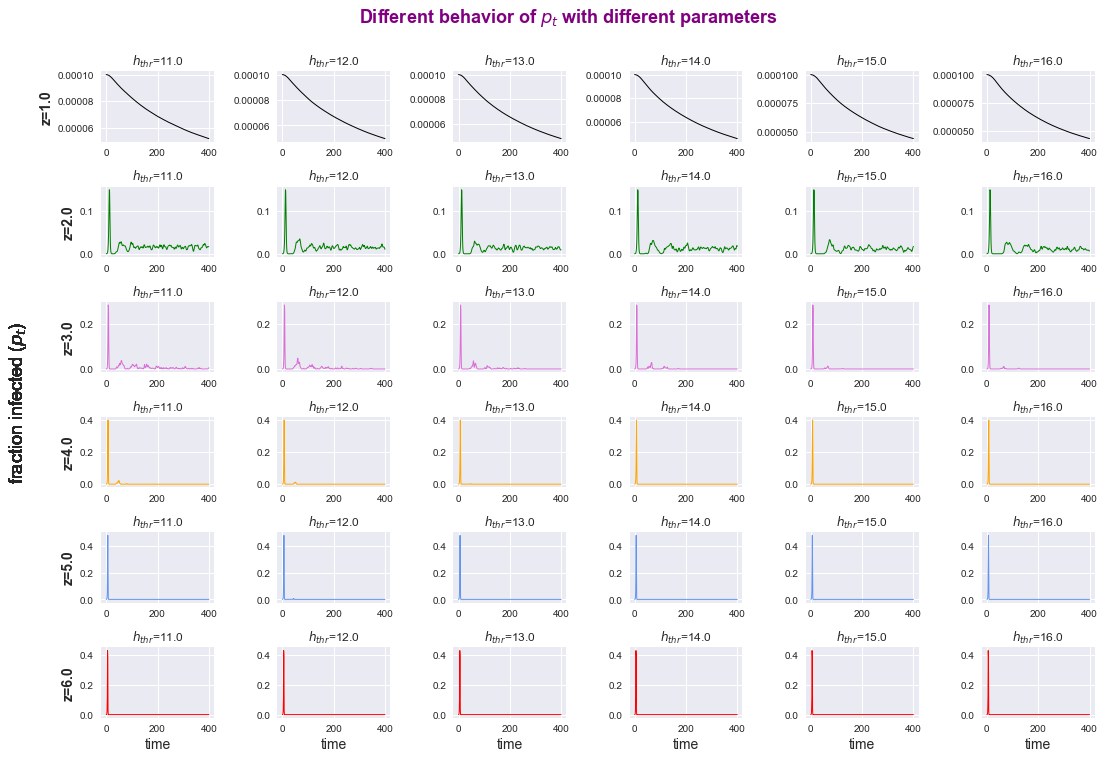

In [213]:
"""Solve and plot"""

start = time.time()

hvec = [11,12, 13, 14, 15, 16]
zvec = [1,2,3,4,5,6] 
T = 400
mu = 0.5
num_sim = 100

random_mutation_solution_plots(hvec, zvec, mu, T, num_sim)

end = time.time()
print('Total execution time is %1.2f' %(end-start))

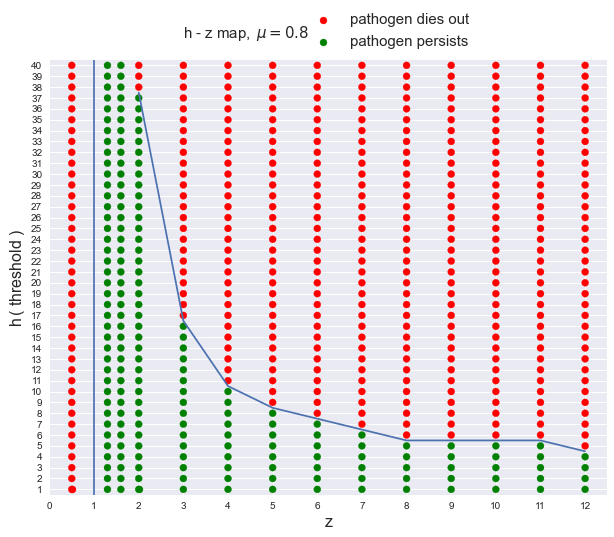

In [30]:
color = {}
color[0] = ['r' for i in range(40)]
color[1] = ['r' for i in range(40)]
color[2] = ['g' for i in range(37)]  + ['r' for i in range(3)]
color[3] = ['g' for i in range(16)] + ['r' for i in range(24)]
color[4] = ['g' for i in range(10)] + ['r' for i in range(30)] 
color[5] = ['g' for i in range(8)] + ['r' for i in range(32)] 
color[6] = ['g' for i in range(7)] + ['r' for i in range(33)]
color[7] = ['g' for i in range(6)]  + ['r' for i in range(34)]
color[8] = ['g' for i in range(5)]  + ['r' for i in range(35)]
color[9] = ['g' for i in range(5)]  + ['r' for i in range(35)]
color[10] = ['g' for i in range(5)] + ['r' for i in range(35)]
color[11] = ['g' for i in range(5)]  + ['r' for i in range(35)]
color[12] = ['g' for i in range(4)]  + ['r' for i in range(36)]
color[14] = ['g' for i in range(40)] 
color[13] = ['g' for i in range(40)] 

plt.figure(figsize=(10,8))
for k in range(2,13):
    plt.scatter([k for i in range(40)], [i for i in range(1,41)] ,color=color[k])
plt.scatter([1.3 for i in range(40)], [i for i in range(1,41)] ,color=color[13])
plt.scatter([1.6 for i in range(40)], [i for i in range(1,41)] ,color=color[14])
plt.scatter([0.5 for i in range(40)], [i for i in range(1,41)] ,color=color[0])
plt.axvline(x=1)
plt.plot( [2,3,4,5,6,7,8,9,10,11,12], [37.5,16.5,10.5,8.5,7.5,6.5,5.5,5.5,5.5,5.5,4.5])
plt.scatter([0.5],[1], color='red', label='pathogen dies out')
plt.scatter([2],[1], color='green', label='pathogen persists')

plt.xlabel('z', fontsize=16)
plt.ylabel('h$\,$( threshold )', fontsize=16)
plt.xticks(np.linspace(0,12,13))
plt.yticks(np.linspace(1,40,40))
plt.xlim([0,12.5])
plt.ylim([0.5,40.5])
plt.text(3,42.5, r'h - z map,$\,$ $\mu=0.8$', fontsize=15)
plt.legend(bbox_to_anchor=(0.44, 0.995), fontsize=15)
plt.savefig('map3.png')
plt.show()    

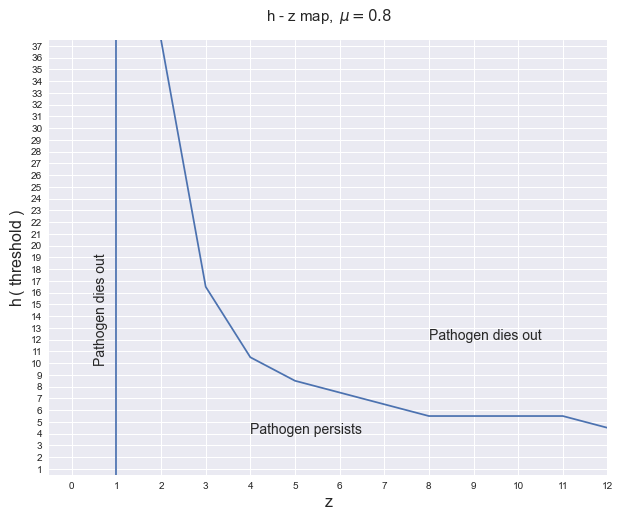

In [32]:
plt.figure(figsize=(10,8))
plt.axvline(x=1)
plt.plot([2,3,4,5,6,7,8,9,10,11,12], [37.5,16.5,10.5,8.5,7.5,6.5,5.5,5.5,5.5,5.5,4.5])
plt.title('h - z map,$\,$ $\mu=0.8$', fontsize=15, y=1.03)
plt.xlabel('z', fontsize=16)
plt.ylabel('h$\,$( threshold )', fontsize=16)
plt.xticks(np.linspace(0,12,13))
plt.yticks(np.linspace(1,40,40))
plt.xlim([-0.5,12])
plt.ylim([0.5,37.5])
plt.text(4,4,'Pathogen persists', fontsize=14)
plt.text(8,12,'Pathogen dies out',  fontsize=14)
plt.text(0.5,10,'Pathogen dies out', rotation='vertical',  fontsize=14)
plt.savefig('map4.png')
plt.show()    

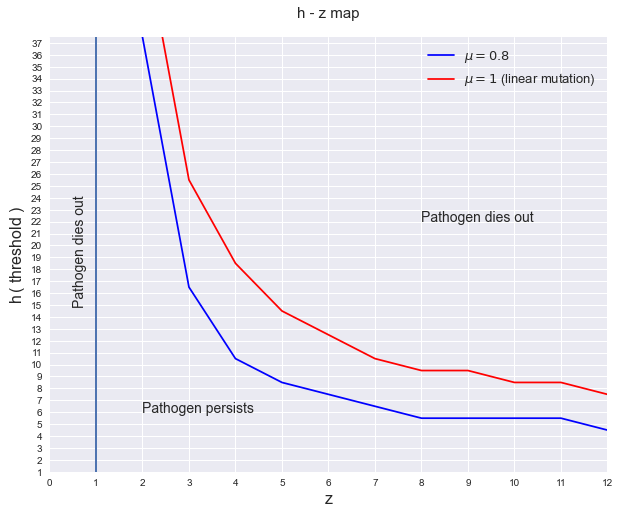

In [36]:
fig, ax =plt.subplots(1,figsize=(10,8))
ax.axvline(x=1)
ax.axvline(x=1)
ax.plot([2,3,4,5,6,7,8,9,10,11,12], [37.5,16.5,10.5,8.5,7.5,6.5,5.5,5.5,5.5,5.5,4.5],
        label='$\mu=0.8$', color='b')
ax.set_xlabel('z', fontsize=14)
ax.set_ylabel(r'$\tau$', fontsize=14)

ax.plot([2,3,4,5,6,7,8,9,10,11,12], [46.5,25.5,18.5,14.5,12.5,10.5,9.5,9.5,8.5,8.5,7.5],
        label='$\mu=1$ (linear mutation)', color='r')

ax.set_xticks(np.linspace(0,12,13))
ax.set_yticks(np.linspace(1,40,40))
ax.set_xlabel('z', fontsize=16)
ax.set_ylabel('h$\,$( threshold )', fontsize=16)
ax.set_title('h - z map', fontsize=15, y=1.03)
ax.set_xlim([0,12])
ax.set_ylim([1,37.5])
plt.text(8, 22, 'Pathogen dies out', fontsize=14)
plt.text(0.5, 15, 'Pathogen dies out', rotation='vertical', fontsize=14)
plt.text(2, 6, 'Pathogen persists', fontsize=14)
ax.legend(fontsize=13)
plt.savefig('map5.png')